In [1]:
# Bibliotecas
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
# Limpar ambiente (equivalente a rm(list = ls()))
tf.keras.backend.clear_session()

In [3]:
# Leitura do banco de dados dos dígitos
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


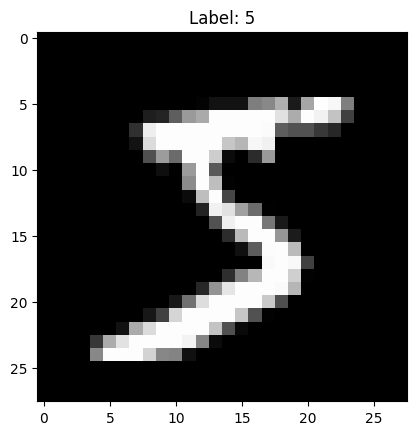

In [4]:
# Visualizando alguns exemplos (dígitos)
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()

In [5]:
# Ajusta os dados para execução pelo keras
# Coloca no formato de uma matriz de preditores 'X'
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [6]:
# Convertendo a resposta para dados categóricos
# Cada dígito é uma classe
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [7]:
## Ajuste da REDE NEURAL - DEEP LEARNING
## Criando a arquitetura do modelo
modelo = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    # layers.Dense(24, activation='relu'),  # Camada opcional comentada
    layers.Dense(10, activation='softmax')
])

## Definindo algoritmos e hiperparâmetros de treinamento
modelo.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Realizando o treinamento do modelo
history = modelo.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    verbose=1
)

# fit: the network will start to iterate on the training data in mini-batches
# of 128 samples, 5 times over (each iteration over all the training data is
# called an epoch)

# Síntese para os dados de validação
results = modelo.evaluate(test_images, test_labels, verbose=0)
print(f"Resultados no conjunto de teste: Loss: {results[0]:.4f}, Accuracy: {results[1]:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8702 - loss: 0.4508
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9650 - loss: 0.1183
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9784 - loss: 0.0754
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9840 - loss: 0.0535
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9879 - loss: 0.0409
Resultados no conjunto de teste: Loss: 0.0592, Accuracy: 0.9823


In [8]:
# Obtendo a matriz de confusão para o conjunto de validação
y_val = np.argmax(test_labels, axis=1)
y_fit = np.argmax(modelo.predict(test_images), axis=1)

from sklearn.metrics import confusion_matrix
print("\nMatriz de confusão:")
print(confusion_matrix(y_val, y_fit))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Matriz de confusão:
[[ 971    0    1    1    0    1    2    1    3    0]
 [   0 1128    1    1    0    1    2    0    2    0]
 [   6    4 1008    1    2    0    2    3    6    0]
 [   0    0    1  994    0    3    0    3    4    5]
 [   0    1    5    0  962    0    2    1    0   11]
 [   2    0    0    4    0  879    4    0    1    2]
 [   6    3    1    1    2    3  939    0    3    0]
 [   1    6    7    2    0    0    0 1007    2    3]
 [   1    0    3    4    2    2    2    3  950    7]
 [   2    3    0    4    4    4    0    6    1  985]]


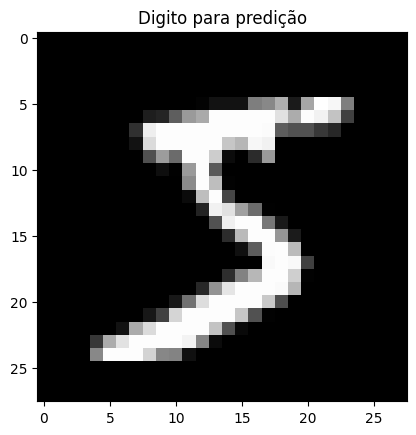

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Classificação: 5


In [9]:
# Utilizando o modelo para uma estimativa de um dígito
# 3.4.5 Using a trained network to generate predictions on new data
x = train_images[0].reshape(1, 28 * 28)

plt.figure()
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.title('Digito para predição')
plt.show()

saida = np.argmax(modelo.predict(x), axis=1)[0]
print(f"Classificação: {saida}")

In [13]:
# - - - - - - - - - - - - - - - - - - - - - - - - -
# Usando o modelo para identificar um dígito seu...
def carregar_e_preprocessar_imagem(caminho_imagem):
    """Carrega e pré-processa uma imagem para classificação"""
    try:
        # Carrega a imagem em escala de cinza
        img = Image.open(caminho_imagem).convert('L')
        # Redimensiona para 28x28
        img = img.resize((28, 28))
        # Converte para array numpy
        img_array = np.array(img)

        # Mostra a imagem original
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(img_array, cmap='gray')
        plt.title('Imagem original (fundo branco)')

        # Pré-processamento: inverte as cores (fundo preto)
        img_tensor = 1 - img_array.astype('float32') / 255.0

        plt.subplot(1, 2, 2)
        plt.imshow(img_tensor, cmap='gray')
        plt.title('Imagem processada (fundo preto)')
        plt.show()

        return img_tensor.reshape(1, 28 * 28)

    except FileNotFoundError:
        print(f"Arquivo {caminho_imagem} não encontrado!")
        return None

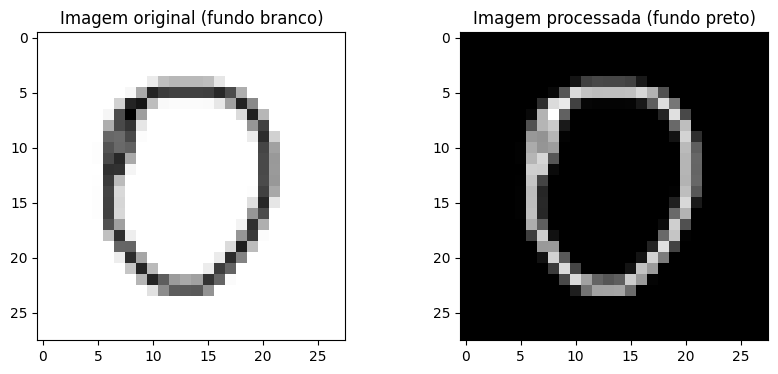

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Classificação: 0


In [14]:
# Exemplo de uso (descomente se tiver uma imagem)
img_path = "digito0_Marcelo.png"
x = carregar_e_preprocessar_imagem(img_path)

if x is not None:
  saida = np.argmax(modelo.predict(x), axis=1)[0]
  print(f"\nClassificação: {saida}")

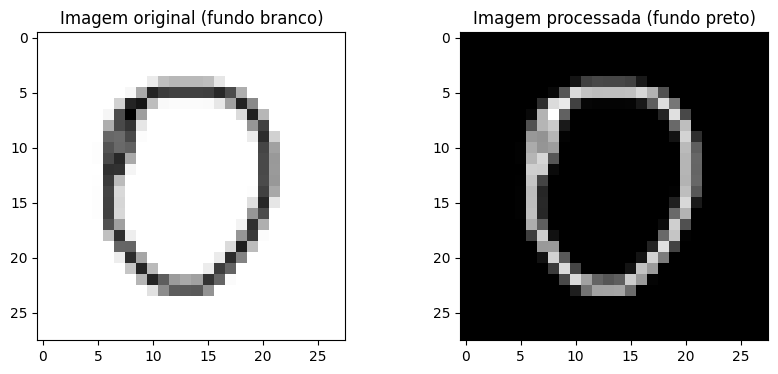


Classificação: 0

Treinamento e teste concluídos!


In [12]:
# Versão alternativa usando carregamento direto se a imagem existir
def classificar_digito_manual():
    """Classifica um dígito manualmente carregado"""
    img_path = "digito0_Marcelo.png"

    if os.path.exists(img_path):
        x = carregar_e_preprocessar_imagem(img_path)
        if x is not None:
            saida = np.argmax(modelo.predict(x, verbose=0), axis=1)[0]
            print(f"\nClassificação: {saida}")
    else:
        print(f"Arquivo {img_path} não encontrado. Pulando classificação de imagem personalizada.")

# Descomente a linha abaixo para executar a classificação de imagem personalizada
classificar_digito_manual()

print("\nTreinamento e teste concluídos!")